In [1]:
from glob import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
task = "acronyms"
ratio = 1.8

df = []
for path in glob(f"hyperparameter_results/{task}_results_*.csv"):
    df.append(pd.read_csv(path))
df = pd.concat(df)
df.columns = ["Ablation Scheme", "Include MLPs", "Threshold", "Accuracy", "Size", "Num. Heads", "Num. MLP"]
df["Size (%)"] = (df["Size"].max() - df["Size"]) / df["Size"].max() * 100
df

,Ablation Scheme,Include MLPs,Threshold,Accuracy,Size,Num. Heads,Num. MLP,Size (%)
0,mean,False,0.000010,0.900,84859200,143,12,0.231377
1,mean,False,0.000015,0.904,84662400,142,12,0.462754
2,mean,False,0.000022,0.900,84268800,140,12,0.925508
3,mean,False,0.000033,0.900,84268800,140,12,0.925508
4,mean,False,0.000049,0.900,84072000,139,12,1.156885
...,...,...,...,...,...,...,...,...
115,zero,True,0.204336,0.000,50012544,14,10,41.200451
116,zero,True,0.303920,0.016,39578304,9,8,53.467946
117,zero,True,0.452035,0.000,33863424,4,7,60.186907
118,zero,True,0.672336,0.000,19096512,1,4,77.548307


In [4]:
#df = df.groupby(["Ablation Scheme", "Include MLPs", "Threshold"]).mean()

In [5]:
df[(df["Accuracy"] >= 0.7) & (df["Ablation Scheme"] == "mean") & (df["Include MLPs"] == True)]

,Ablation Scheme,Include MLPs,Threshold,Accuracy,Size,Num. Heads,Num. MLP,Size (%)
30,mean,True,0.000010,0.900,84859200,143,12,0.231377
31,mean,True,0.000015,0.904,84662400,142,12,0.462754
32,mean,True,0.000022,0.900,84268800,140,12,0.925508
33,mean,True,0.000033,0.900,84268800,140,12,0.925508
34,mean,True,0.000049,0.900,84072000,139,12,1.156885
...,...,...,...,...,...,...,...,...
47,mean,True,0.008532,0.976,59071488,12,12,30.549887
48,mean,True,0.012690,0.980,58874688,11,12,30.781264
49,mean,True,0.018874,0.976,58279680,8,12,31.480813
50,mean,True,0.028072,0.976,58279680,8,12,31.480813


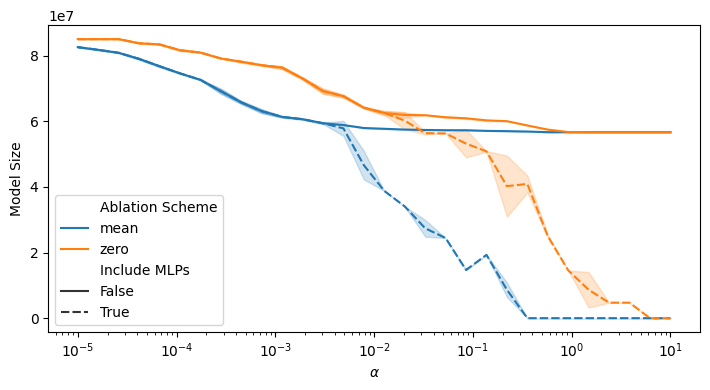

In [157]:
plt.figure(figsize=(ratio*4, 4))
ax = sns.lineplot(df, x="Threshold", y="Size", 
                  hue="Ablation Scheme", style="Include MLPs", errorbar="sd")
ax.set_xscale("log")
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel("Model Size")
plt.tight_layout()
plt.savefig(f"images/{task}_alpha_size.pdf")

In [158]:
df_grouped = df.groupby(["Threshold", "Ablation Scheme", "Include MLPs"]).mean()[["Accuracy", "Size (%)"]]
df_grouped["error"] = df.groupby(["Threshold", "Ablation Scheme", "Include MLPs"]).std()["Accuracy"]
df_grouped

Accuracy   Size (%)     error
Threshold Ablation Scheme Include MLPs                               
0.000010  mean            False           0.9976   2.869074  0.003578
                          True            0.9976   2.869074  0.003578
          zero            False           0.9968   0.000000  0.003347
                          True            0.9968   0.000000  0.003347
0.000016  mean            False           0.9968   3.840858  0.003347
...                                          ...        ...       ...
6.210169  zero            True            0.9712  99.998194  0.039537
10.000000 mean            False           0.8928  33.350790  0.075440
                          True            0.8320  99.998194  0.202247
          zero            False           0.0000  33.350790  0.000000
                          True            0.9712  99.998194  0.039537

[120 rows x 3 columns]

In [159]:
data_up = df_grouped.copy()
data_down = df_grouped.copy()
data_up["Accuracy"] = data_up["Accuracy"] + data_up["error"]
data_down["Accuracy"] = data_down["Accuracy"] - data_down["error"]
df_grouped = pd.concat([data_up, data_down])

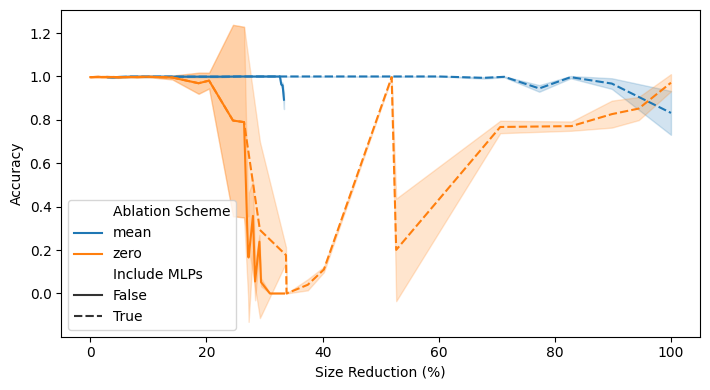

In [160]:
plt.figure(figsize=(ratio*4, 4))
ax = sns.lineplot(df_grouped, x="Size (%)", y="Accuracy", hue="Ablation Scheme", style="Include MLPs")
ax.set_xlabel("Size Reduction (%)")
plt.tight_layout()
plt.savefig(f"images/{task}_size_acc.pdf")